In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = (10.0, 8.0)

## Distribution of Floating Point Numbers

Recall that any positive number $x$ in a normalized binary floating-point system is of the form:

$x = 1.a_1a_2a_3\dots a_n \times 2^m,$

where $n$ is the number of bits stored in the fractional part of the significand, $a_i \in \{0,1\}$ are the bits themselves, and $m \in [L,U]$ is the exponent.

Suppose we have a binary floating point system with $n = 3$, an exponent range of $[L,U] = [-4,4]$, and we want to generate a list of all the **positive normalized** numbers in this floating point system in ascending order.  We would like to store their representation in the standard **decimal** system.

That is, our list should look like this:

- $1.000 \times 2^{-4} = .0625$
- $1.001 \times 2^{-4} = .0703125$
- $1.010 \times 2^{-4} = .078125$
- $1.011 \times 2^{-4} = .0859375$
- $\dots$
- $1.111 \times 2^{-4} = .1171875$
- $1.000 \times 2^{-3} = .125$
- $1.001 \times 2^{-3} = .140625$
- $\dots$
- $1.110 \times 2^4 = 28$
- $1.111 \times 2^4 = 30$

In order to do so, let's recall that the binary representation means:

$ 1.a_1a_2a_3 \times 2^m = \left(1 + \frac{a_1}{2} + \frac{a_2}{2^2} + \frac{a_3}{2^3}\right)\times 2^m$

We'll write a nested loop to generate all the numbers in the list in decimal format using this expression:

In [2]:
base = 2
exponent_min = -4
exponent_max = 4

fp_3 = []
for m in range(exponent_min,exponent_max + 1):
    for a_1 in range(0,base):
        for a_2 in range(0,base):
            for a_3 in range(0,base):
                significand = 1 + a_1*base**-1 + a_2*base**-2 + a_3*base**-3
                new_number = significand * base**m
                fp_3.append(new_number)     

In [3]:
print(fp_3[:4]) # first four number
print(fp_3[-2:]) # last two numbers

[0.0625, 0.0703125, 0.078125, 0.0859375]
[28.0, 30.0]


Ok, it seems to be working.  However, we used 4 loops: 1 for the exponent, and 1 for each bit in the fraction.  So if we want to do the same thing for a floating point system for $n = 23$, like IEEE single precision, we would need 24 loops!  That's way too much!

There's a simpler way to express these floating point numbers.  Let's examine the first 4 numbers:
- $1.000 \times 2^{-4} = \left(1 + \frac{0}{2^1} + \frac{0}{2^2} +  \frac{0}{2^3}\right) \times 2^{-4} = \left(1 + \frac{0}{2^3}\right)\times 2^{-4}$
- $1.001 \times 2^{-4} = \left(1 + \frac{0}{2^1} + \frac{0}{2^2} +  \frac{1}{2^3}\right) \times 2^{-4} = \left(1 + \frac{1}{2^3}\right)\times 2^{-4}$
- $1.010 \times 2^{-4} = \left(1 + \frac{0}{2^1} + \frac{1}{2^2} +  \frac{0}{2^3}\right) \times 2^{-4} = \left(1 + \frac{1}{2^2}\right)\times 2^{-4} = \left(1 + \frac{2}{2^3}\right) \times 2^{-4}$
- $1.011 \times 2^{-4} = \left(1 + \frac{0}{2^1} + \frac{1}{2^2} +  \frac{1}{2^3}\right) \times 2^{-4} = \left(1 + \frac{1}{2^2} + \frac{1}{2^3}\right)\times 2^{-4} = \left(1 + \frac{2}{2^3} + \frac{1}{2^3}\right)\times 2^{-4} = \left(1 + \frac{3}{2^3}\right) \times 2^{-4}$

Are you seeing a pattern?  Use this to generate all the positive floating point numbers in a binary system for any given $n$ and exponent range $[L,U]$.  You should only need two loops.


**Check your answers!** 
#### Complete the function `fp_numbers` that returns a 1d numpy array `fp` which stores all the floating numbers in ascending order.

In [14]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 

def fp_numbers(n,L,U):
    fp_n=[]
    base = 2
    exponent_min = L
    exponent_max = U
    for m in range(exponent_min,exponent_max + 1):
        for j in range(2**n):
            significand = 1+(j/2**n)
            new_number = significand * base**m
            fp_n.append(new_number)
    return np.array(fp_n)
            

**Check your answers!** 
#### Use your function to define the variable `fp_ref` for a floating point system with the values for $n$, $L$ and $U$ provided in the PrairieLearn question (main page):

In [16]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
n=2; L=-6; U=6
fp_ref = fp_numbers(n,L,U)
print(fp_ref )

[1.562500e-02 1.953125e-02 2.343750e-02 2.734375e-02 3.125000e-02
 3.906250e-02 4.687500e-02 5.468750e-02 6.250000e-02 7.812500e-02
 9.375000e-02 1.093750e-01 1.250000e-01 1.562500e-01 1.875000e-01
 2.187500e-01 2.500000e-01 3.125000e-01 3.750000e-01 4.375000e-01
 5.000000e-01 6.250000e-01 7.500000e-01 8.750000e-01 1.000000e+00
 1.250000e+00 1.500000e+00 1.750000e+00 2.000000e+00 2.500000e+00
 3.000000e+00 3.500000e+00 4.000000e+00 5.000000e+00 6.000000e+00
 7.000000e+00 8.000000e+00 1.000000e+01 1.200000e+01 1.400000e+01
 1.600000e+01 2.000000e+01 2.400000e+01 2.800000e+01 3.200000e+01
 4.000000e+01 4.800000e+01 5.600000e+01 6.400000e+01 8.000000e+01
 9.600000e+01 1.120000e+02]


## Display a plot of the density of the floating point numbers in this system

Use the plotting function below to see the distribution of the floating point numbers you obtained above:

Text(0.5, 1.0, 'Distribution of all Floating Point Numbers')

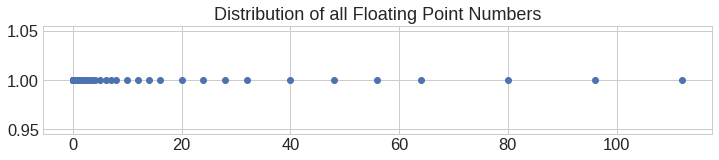

In [6]:
plt.figure(figsize=(12,2))
plt.plot(fp_ref, np.ones_like(fp_ref), "o");
plt.title('Distribution of all Floating Point Numbers')

## Checking important features of Floating Point numbers

#### a) What is the smallest (positive) normalized floating point number for this system?

We can answer this question by getting the first entry from the numpy array, since the array was sorted in ascending order:

In [7]:
UFL = fp_ref[0]
print(UFL)

0.015625


**Try this!**

You can also get the same result using the expression derived in lecture.  Evaluate UFL using $2^L$

In [8]:
UFL = 2**L
print(UFL)

0.015625


**Check your answers!**

#### b) What is the largest (positive) normalized floating point number for this system? Define the variable OFL.

In [9]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
OFL = fp_ref[-1]
print(OFL)

112.0


**Check your answers!**

#### c) What is machine epsilon for this floating point system?

We can use `np.argwhere` to get the index of the entry in `fp_ref` that contains the number `1.0`. 

Recall that machine epsilon is the gap between 1 and the **next larger** floating point number. How can you use the method above to obtain machine epsilon?

In [11]:
index = np.argwhere(fp_ref==1.0)
eps_machine = ...
print('Machine Epsilon is:', eps_machine)

Machine Epsilon is: Ellipsis


Using the definition above, machine epsilon is also given by $\epsilon = 2^{-n}$. Check your results, and see if it makes sense.

In [12]:
index = np.argwhere(fp_ref==1.0)
eps_machine = fp_ref[index+1] - fp_ref[index]
print('Machine Epsilon is:', eps_machine)

Machine Epsilon is: [[0.25]]


#### d) What is the range of integer numbers that you can represent **exactly** without skipping any integer?  

Print your array of floating point numbers `fp_ref`. Note that there is a range of integer numbers that are represented exacly ($1, 2, 3, ...$) and at some point you start having gaps between integer numbers ($50, 52, 54, ...$). We say that **all** integers within the range $(1,maxint)$ can be represented exactly. What is $maxint$ for your floating point system? 


In [18]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
# print(fp_ref)

maxint = 2**(n+1)
print(maxint)

8
